In [ ]:
import os
import zipfile
local_zip = '/content/proj1.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/phone_headphone')
zip_ref.close()

In [ ]:
train_headphone_dir = os.path.join('/content/phone_headphone/proj1/headphone')
train_phone_dir =os.path.join('/content/phone_headphone/proj1/mobile')
train_watch_dir =os.path.join('/content/phone_headphone/proj1/Watch')
train_camera_dir =os.path.join('/content/phone_headphone/proj1/camera')
train_mouse_dir =os.path.join('/content/phone_headphone/proj1/pc_mouse')
train_hoverboard_dir =os.path.join('/content/phone_headphone/proj1/hoverboard')
train_vrglass_dir =os.path.join('/content/phone_headphone/proj1/vrglass')


In [ ]:
train_headphone_names = os.listdir(train_headphone_dir)
print(train_headphone_names[:10])
train_phone_names =os.listdir(train_phone_dir)
print(train_phone_names[:10])
train_camera_names = os.listdir(train_camera_dir)
print(train_camera_names[:10])
train_watch_names = os.listdir(train_watch_dir)
print(train_watch_names[:10])
train_mouse_names = os.listdir(train_mouse_dir)
print(train_mouse_names[:10])
train_hoverboard_names = os.listdir(train_hoverboard_dir)
print(train_hoverboard_names[:10])
train_vrglass_names = os.listdir(train_vrglass_dir)
print(train_vrglass_names[:10])

['headphone (22).jpg', 'headphone (38).jpg', 'headphone - 2020-04-23T134254.488.jpg', 'headphone (29).jpg', 'headphone (14).jpg', 'headphone (18).jpg', 'headphone (28).jpg', 'headphone - 2020-04-23T134254.040.jpg', 'headphone - 2020-04-23T134254.487.jpg', 'headphone (39).jpg']
['phone (19).jpg', 'phone (33).jpg', 'phone (35).jpg', 'phone (28).jpg', 'phone (4).jpg', 'phone (26).jpg', 'phone (29).jpg', 'phone (14).jpg', 'phone (5).jpg', 'phone (41).jpg']
['pic_592.png', 'pic_588.jpg', 'pic_605.jpeg', 'camera - 2020-06-13T164119.307.jpg', 'pic_598.jpeg', 'camera - 2020-06-13T164120.533.jpg', 'pic_586.jpg', 'pic_610.jpg', 'camera - 2020-06-13T164118.338.jpg', 'pic_585.jpg']
['headphone (100).jpg', 'headphone (5).jpg', 'headphone (94).jpg', 'headphone - 2020-06-13T163635.476.jpg', 'headphone - 2020-06-13T163635.384.jpg', 'headphone (22).jpg', 'headphone (91).jpg', 'headphone (14).jpg', 'headphone (97).jpg', 'headphone (18).jpg']
['mouse - 2020-06-13T171141.474.jpg', 'mouse - 2020-06-13T1711

In [ ]:
print('Total headphone images train:',len(os.listdir(train_headphone_dir)))
print('total phone images train:',len(os.listdir(train_phone_dir)))
print('Total watch images train:',len(os.listdir(train_watch_dir)))
print('total camera images train:',len(os.listdir(train_camera_dir)))
print('Total mouse images train:',len(os.listdir(train_mouse_dir)))
print('total hoverboard images train:',len(os.listdir(train_hoverboard_dir)))
print('Total vr glass images train:',len(os.listdir(train_vrglass_dir)))


Total headphone images train: 51
total phone images train: 51
Total watch images train: 51
total camera images train: 50
Total mouse images train: 51
total hoverboard images train: 50
Total vr glass images train: 51


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 28
nclos = 4
pic_index = 0

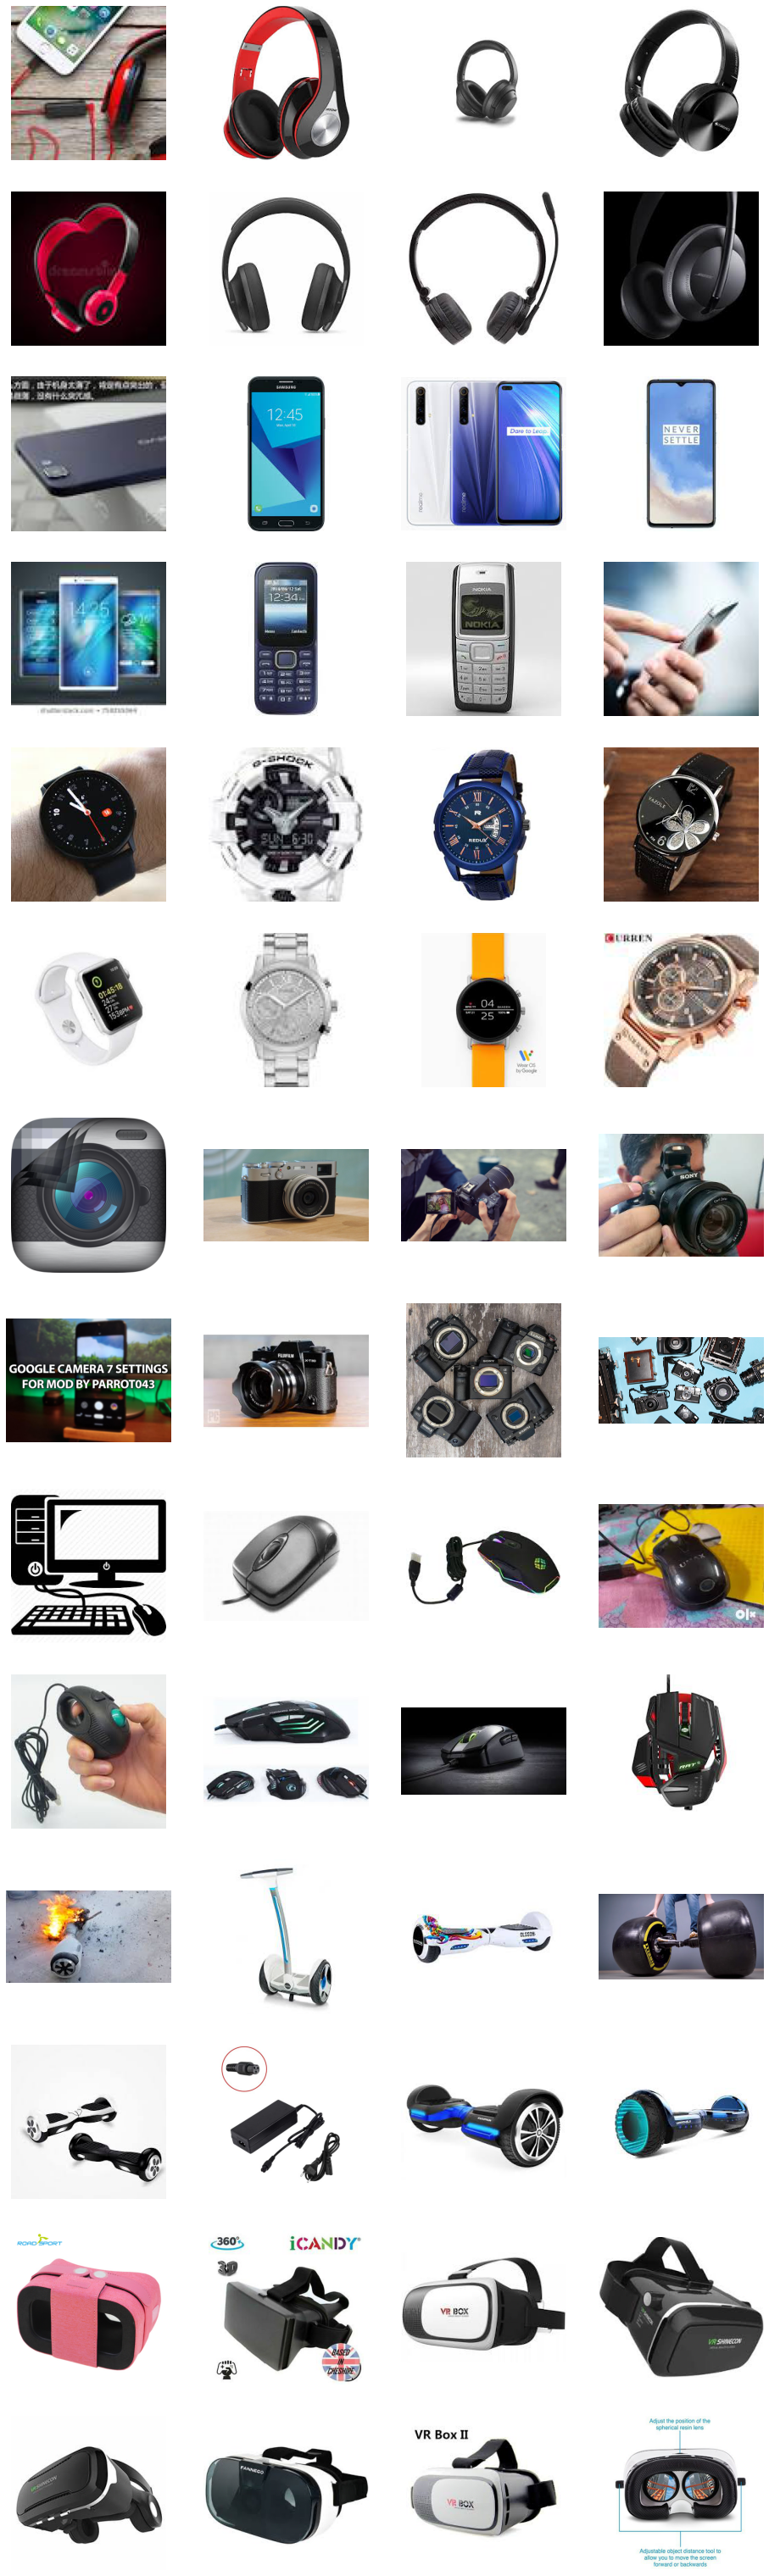

In [ ]:
fig = plt.gcf()
fig.set_size_inches(nclos*4,nrows * 4)
pic_index +=8
next_headphone_pix = [os.path.join(train_headphone_dir, fname) 
                for fname in train_headphone_names[pic_index-8:pic_index]]
next_phone_pix = [os.path.join(train_phone_dir, fname) 
                for fname in train_phone_names[pic_index-8:pic_index]]
next_watch_pix = [os.path.join(train_watch_dir, fname) 
                for fname in train_watch_names[pic_index-8:pic_index]]
next_camera_pix = [os.path.join(train_camera_dir, fname) 
                for fname in train_camera_names[pic_index-8:pic_index]]
next_mouse_pix = [os.path.join(train_mouse_dir, fname) 
                for fname in train_mouse_names[pic_index-8:pic_index]]  
next_hoverboard_pix = [os.path.join(train_hoverboard_dir, fname) 
                for fname in train_hoverboard_names[pic_index-8:pic_index]]  
next_vrglass_pix = [os.path.join(train_vrglass_dir, fname) 
                for fname in train_vrglass_names[pic_index-8:pic_index]]                                            
for i,img_path in enumerate(next_headphone_pix+next_phone_pix+next_watch_pix+
                            next_camera_pix+next_mouse_pix+next_hoverboard_pix+next_vrglass_pix):
  sp = plt.subplot(nrows,nclos,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        '/content/phone_headphone/proj1',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='categorical')

Found 345 images belonging to 7 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=2,  
      epochs=100,
      verbose=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/100
2/2 [==============================] - 1s 413ms/step - loss: 2.6832 - accuracy: 0.1198
Epoch 2/100
2/2 [==============================] - 1s 298ms/step - loss: 1.9563 - accuracy: 0.1475
Epoch 3/100
2/2 [==============================] - 1s 385ms/step - loss: 1.9367 - accuracy: 0.2350
Epoch 4/100
2/2 [==============================] - 1s 360ms/step - loss: 1.9848 - accuracy: 0.1602
Epoch 5/100
2/2 [==============================] - 0s 196ms/step - loss: 1.9303 - accuracy: 0.2304
Epoch 6/100
2/2 [==============================] - 0s 212ms/step - loss: 1.8951 - accuracy: 0.2581
Epoch 7/100
2/2 [==============================] - 1s 300ms/step - loss: 1.8750 - accuracy: 0.2719
Epoch 8/100
2/2 [==============================] - 1s 325ms/step - loss: 1.8094 - accuracy: 0.2673
Epoch 9/100
2/2 [==============================] - 0s 246ms/step - loss: 2.0361 - accuracy: 0.2166
Epoch 10/100
2/2 [==============================] - 1s 292ms/step - loss: 1.7491 - accuracy: 0.3320
Epoch 11/

In [ ]:
import numpy as np
import random
import tensorflow.keras.preprocessing.image 
from keras.preprocessing.image import array_to_img
successive_outputs = [layer.output for layer in model.layers[1:]]

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(np.argmax(classes[0]))

Saving pic_176.jpg to pic_176.jpg
0


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(type(classes))
  print(classes)
  watch=[[1., 0., 0., 0., 0., 0., 0.]]
  camera = [[0., 1., 0., 0., 0., 0., 0.]]
  headphone=[[0.,0.,1.,0., 0., 0., 0.]]
  phone=[[0.,0.,0.,1., 0., 0., 0.]]
  hoverboard=[[0.,0.,0.,0., 1., 0., 0.]]
  mouse=[[0.,0.,0.,0., 0., 1., 0.]]
  vr_glass=[[0.,0.,0.,0., 0., 0., 1.]]
  if (classes[0]==watch).all():
    print(fn + " is a Watch")
  elif (classes[0]==camera).all():
    print (fn + " is a camera ")
  elif (classes[0]==headphone).all():
    print (fn + " is a headphone")
  elif (classes[0]==phone).all():
    print (fn + " is a phone")
  elif (classes[0]==hoverboard).all():
    print (fn + " is a hoverboard")
  elif (classes[0]==vr_glass).all():
    print (fn + " is a vr_glass")
  elif (classes[0]==mouse).all():
    print (fn + " is a mouse. ")
  

Saving pic_037.jpg to pic_037 (1).jpg
<class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0. 1.]]
pic_037.jpg is a vr_glass


In [ ]:
e=(classes[0])
print(e)
c=[[1., 0., 0., 0., 0.]]
print(c)
#print(e==c)
print((e==c).all())




[1.]
[[1.0, 0.0, 0.0, 0.0, 0.0]]
False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


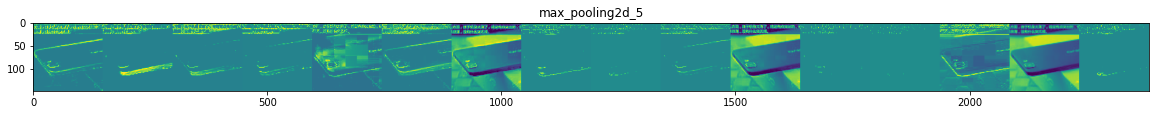

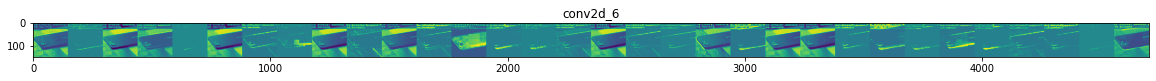

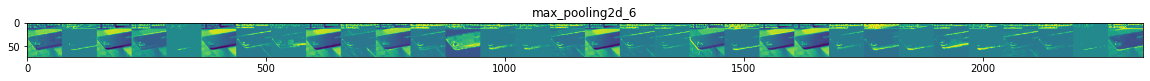

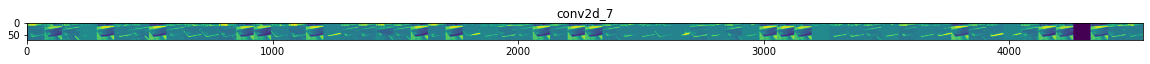

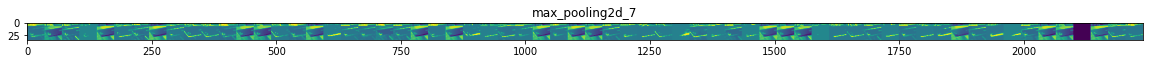

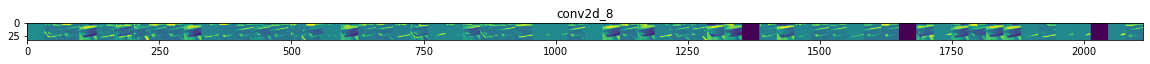

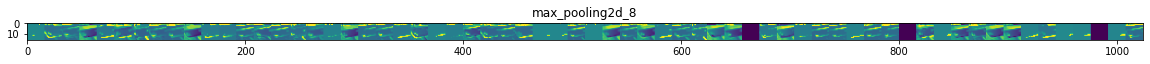

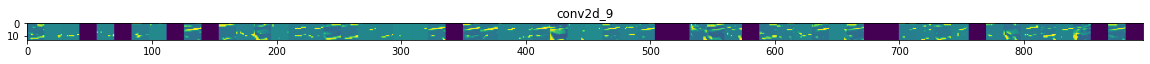

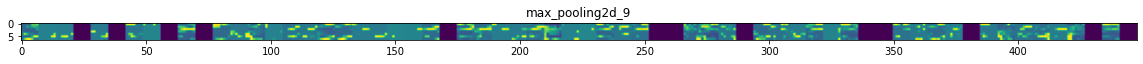

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_phone_dir, f) for f in train_phone_names]
human_img_files = [os.path.join(train_camera_dir, f) for f in train_camera_names]
img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
# Rescale by 1/255
x /= 255
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')